In [85]:
# Mithil Patel 
# DSC 530 Week 6 Assignment
# 17th July, 2022

# Importing libraries
import first
import thinkplot
import thinkstats2
import numpy as np
import math
import scipy

# assigning age and weight variable
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
age = live.agepreg
weight = live.totalwgt_lb

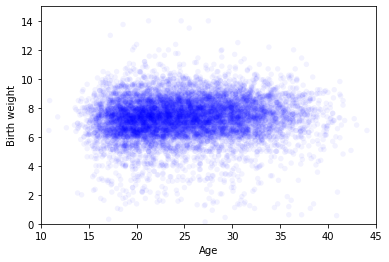

In [86]:
# Creating a scatterplot
thinkplot.Scatter(age, weight, alpha=0.05)
thinkplot.Config(xlabel='Age', ylabel='Birth weight',
                axis=[10, 45, 0, 15])

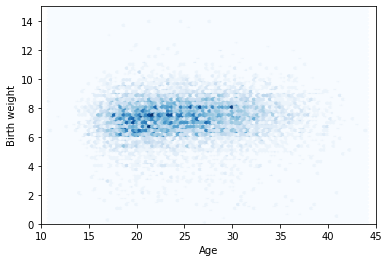

In [87]:
# Creating a Binned scatterplot
thinkplot.HexBin(age, weight)
thinkplot.Config(xlabel='Age', ylabel='Birth weight',
                axis=[10, 45, 0, 15])

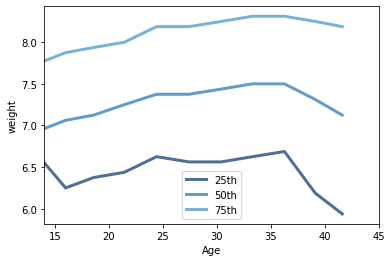

In [88]:
# Plotting percentiles of birth weight vs mother's age
bins = np.arange(5, 45, 3)
indices = np.digitize(live.agepreg,bins)
group = live.groupby(indices)

age = [gro.agepreg.mean() for i,gro in group][1:-1]
cdfs = [thinkstats2.Cdf(gro.totalwgt_lb) for i,gro in group][1:-1]

for p in [25,50,75]:
    weight = [cdf.Percentile(p) for cdf in cdfs]
    label = '%dth' % p
    thinkplot.Plot(age, weight, label=label)

thinkplot.Config(xlabel="Age", ylabel='weight', xlim=[14, 45], legend=True)

In [89]:
# Computong Pearson's and Spearman's correlation
corr = scipy.stats.pearsonr(age, weight)[0]
spear = scipy.stats.spearmanr(age,weight)[0]
print(f"Pearson’s corr: {corr}\nSpearman’s corr: {spear}")

Pearson’s corr: 0.8660485032843649
Spearman’s corr: 0.8203548976076677


How would you characterize the relationship between these variables?

Based on the scatterplot, there appears to be a weak relationship between the mother's age and the baby's weight. The percentile plot at various percentages suggests that weight quickly increases at a young age and the effect seems to get weaker as the age increases. The relatively low Pearson's and Spearman's correlation values suggest that the relationship is either non-linear or heavily influenced by outliers.

Problem 8.1

In [90]:
import numpy as np
import math
import random

def mean_error(estimates, actual):
    error = [(esti - actual) for esti in estimates]
    return np.mean(error)

def estimate_mean(n,m):
    means= []
    medians = []
    
    for i in range(m):
        x = [random.gauss(0,1) for j in range(n)]
        x_bar = np.mean(x)
        median = np.median(x)
        means.append(x_bar)
        medians.append(median)
    
    return (mean_error(means,0),mean_error(medians,0))

test1 = estimate_mean(100,1000)
test2 = estimate_mean(50,1000)
print(f"mean: {test1[0]} median: {test1[1]}")
print(f"mean: {test2[0]} median: {test2[1]}")

mean: 0.0013402806762932101 median: -0.000797826374013511
mean: -0.0018977960784821943 median: -0.003310163020105852


Based on the calculated mean error values above, they tend to converge to zero; therefore, the mean and median are unbiased estimate of mu. 

In [91]:
def rmse(estimates, actual):
    est = [(estimate - actual)**2 for estimate in estimates]
    return math.sqrt(np.mean(est))

def estimate_sv(n,m):
    estimate_1 = []
    estimate_2 = []
    
    for i in range(m):
        x = [random.gauss(0,1) for j in range(n)]
        unbias = np.var(x, ddof = 1)
        bias = np.var(x)
        estimate_1.append(unbias)
        estimate_2.append(bias)
    
    return (mean_error(estimate_1, 2),mean_error(estimate_2, 2))

test3 = estimate_sv(100,1000)
test4 = estimate_sv(50,1000)
print(f"mean: {test3[0]} median: {test3[1]}")
print(f"mean: {test4[0]} median: {test4[1]}")

mean: -0.9943634738959373 median: -1.004419839156978
mean: -0.9903536012185216 median: -1.010546529194151


Based on the calculation above, the biased estimator is a lower value compared to unbiased estimator, which means biased estimator results in a lower mean square error (MSE).

problem 8.2

standard error: 0.8663174838969014
confidence interval: (1.2637065636617606, 3.7357089302011057)


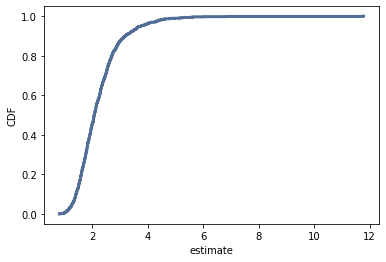

In [92]:
import thinkstats2
import thinkplot
def exponential_estimate(n):
    lam= 2
    m= 1000
    
    expo_estimate = []
    
    for i in range(m):
        x = np.random.exponential(1/lam,n)
        L = 1/np.mean(x)
        expo_estimate.append(L)
    
    cdf = thinkstats2.Cdf(expo_estimate)
    se = rmse(expo_estimate, lam)
    CI = cdf.Percentile(5), cdf.Percentile(95)
    return expo_estimate, se, CI

expo_estimate, se, CI = exponential_estimate(10)

print('standard error:', se)
print('confidence interval:', CI)

cdf = thinkstats2.Cdf(expo_estimate)
thinkplot.cdf(cdf)
thinkplot.Config(xlabel='estimate', ylabel='CDF')

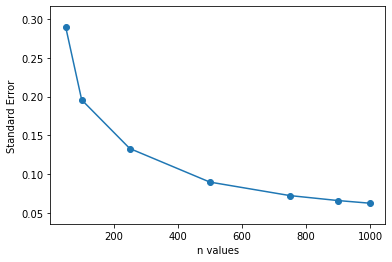

In [93]:
import matplotlib.pyplot as plt

n = []
std_error = []

for i in [50,100,250,500,750,900, 1000]:
    expo_estimate, se, CI = exponential_estimate(i)
    n.append(i)
    std_error.append(se)

plt.scatter(n,std_error)
plt.plot(n,std_error)

plt.xlabel("n values")
plt.ylabel("Standard Error")
plt.show()